## MMC - L5 - Kacper Marchlewicz - 310195

# Perkolacja na przykładzie modelu SIR rozprzestrzeniania się epidemii
Jednym z najprostszych modeli rozprzestrzeniania się patogenów jest model SIR. W tym modelu populacja jest podzielona na trzy rozłączne grupy:
    S – osobniki podatne na zachorowanie
    I – osobniki zakażone
    R – osobniki odporne, czyli takie, które już nigdy nie zachorują
# Zadanie 3
Symulacja podróżowania populacji została zaimplementowana poniższą funkcją. Założono liczbę podróży nie większą niż połowa populacji (w okresie pandemii nadal sporo osób praktycznie nie opuszczało miejsc zamieszkania). Następnie jeśli spełnione zostało prawdopodobieństwo to losowane są dwa różne osobniki i zamieniane są miejscami (stanami). W sprawozdaniu najpierw będą podane wykresy dla przypadku bez podróży a następnie z coraz większym parametrem. Z uwagi na dość sporą obszerność i lepszą czytelność wnioski będą na końcu sprawozdania.

In [1]:
'''
double travel_param = 0.9;
        long liczba = liczebnosc();
        for(int i=0; i<liczba/2; i++){
            // szansa na podróż
            if (rng.losuj_od_0_do_1() < travel_param){
                // losujemy dwa różne osobniki
                Koordynaty wsp_travel_1, wsp_travel_2;
                do {wsp_travel_1 = rng.losuj_koordynaty(); wsp_travel_2 = rng.losuj_koordynaty();} while ((wsp_travel_1.x==wsp_travel_2.x)&&(wsp_travel_1.y==wsp_travel_2.y));
                zamien_osobniki(wsp_travel_1, wsp_travel_2);}
        }
'''

'\ndouble travel_param = 0.9;\n        long liczba = liczebnosc();\n        for(int i=0; i<liczba/2; i++){\n            // szansa na podróż\n            if (rng.losuj_od_0_do_1() < travel_param){\n                // losujemy dwa różne osobniki\n                Koordynaty wsp_travel_1, wsp_travel_2;\n                do {wsp_travel_1 = rng.losuj_koordynaty(); wsp_travel_2 = rng.losuj_koordynaty();} while ((wsp_travel_1.x==wsp_travel_2.x)&&(wsp_travel_1.y==wsp_travel_2.y));\n                zamien_osobniki(wsp_travel_1, wsp_travel_2);}\n        }\n'

Zostały napisane odpowiednie funkcje dla przetworzenia i wyświetlenia danych z plików z wynikami symulacji:

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def load_from_files(chorzy, ozdrowiali, podatni):
    lista_chorzy = []
    lista_ozdrowiali = []
    lista_podatni = []

    with open(chorzy) as file:
        for line in file:
            values = [int(item) for item in line.strip().split()]
            lista_chorzy.append(values)

    with open(ozdrowiali) as file:
        for line in file:
            values = [int(item) for item in line.strip().split()]
            lista_ozdrowiali.append(values)

    with open(podatni) as file:
        for line in file:
            values = [int(item) for item in line.strip().split()]
            lista_podatni.append(values)

    return lista_chorzy, lista_ozdrowiali, lista_podatni

def plot_results(lista_chorzy, lista_ozdrowiali, lista_podatni):
    fig, ax = plt.subplots(3,1,figsize=(8,15))
    time = np.arange(0, len(lista_chorzy[0]), 1)
    
    for sim in lista_chorzy:
        ax[0].plot(time, sim, color='r')
    ax[0].set_title('Chorzy')
    ax[0].set_xlabel('Dzień')
    ax[0].set_ylabel('Liczba chorych')
    ax[0].grid(True)

    for sim in lista_ozdrowiali:
        ax[1].plot(time, sim, color='b')
    ax[1].set_title('Ozdrowiali')
    ax[1].set_xlabel('Dzień')
    ax[1].set_ylabel('Liczba ozdrowiałych')
    ax[1].grid(True)

    for sim in lista_podatni:
        ax[2].plot(time, sim, color='g')
    ax[2].set_title('Podatni')
    ax[2].set_xlabel('Dzień')
    ax[2].set_ylabel('Liczba podatnych')
    ax[2].grid(True)

    fig.tight_layout()
    plt.show()

def plot_map(file, title):
    with open(file, 'r') as f:
        data = [line.strip().split() for line in f]

    x_coords = []
    y_coords = []
    colors = []
    for y,row in enumerate(data):
        for x, value in enumerate(row):
            x_coords.append(x)
            y_coords.append(y)
            colors.append(int(value))
    
    plt.figure(figsize=(3, 3))
    scatter = plt.scatter(x_coords, y_coords, c=colors, cmap='viridis', marker='s')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Values')
    plt.gca().invert_yaxis()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()


Uruchomiono najpierw symulację bez modyfikacji wprowadzającej podróże osobników. Wybrane początkujące prametry: <br>
    liczba osobiników = 1000000  <br>
    liczba chorych = 500 <br>
    cliczba zaszczepionych = 10000 <br>
    prawdopodobieństwo zakażenia beta = 0.5 <br>
    prawdopodobieństwo wyzdrowienia gamma = 0.25 <br>
    liczba eksperymentów = 20 <br>
    liczba dni = 120 <br>

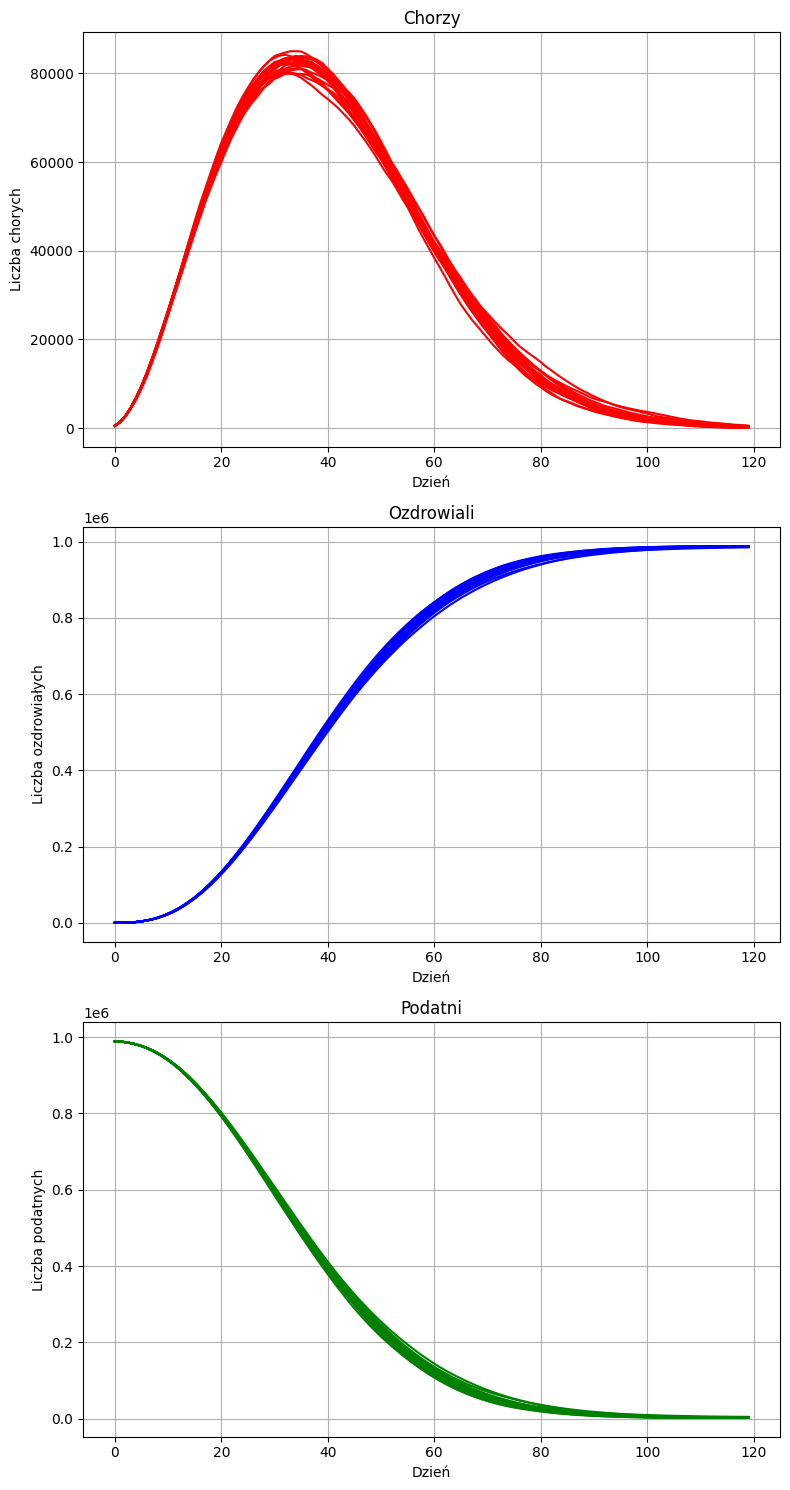

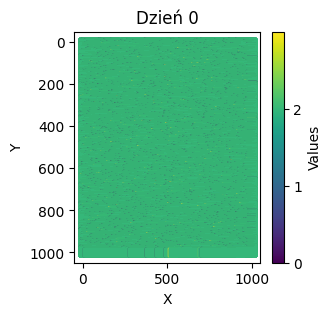

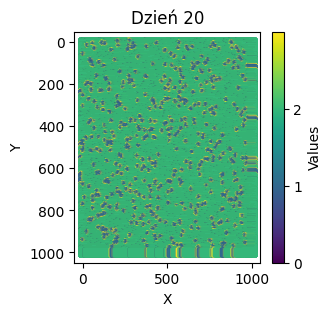

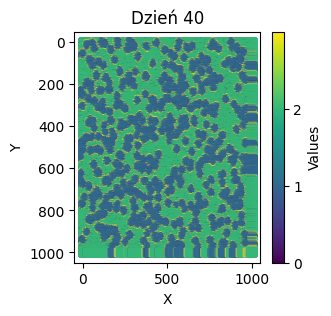

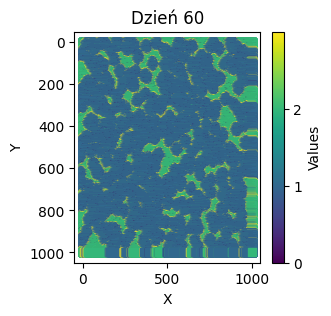

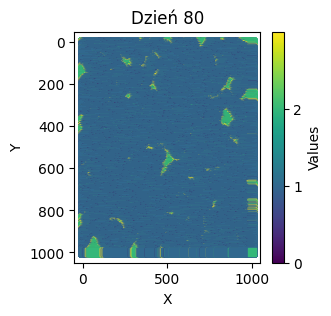

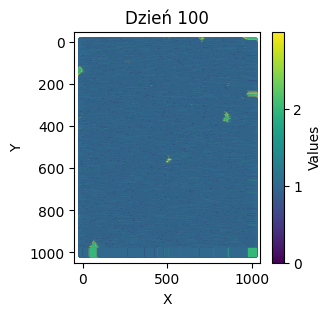

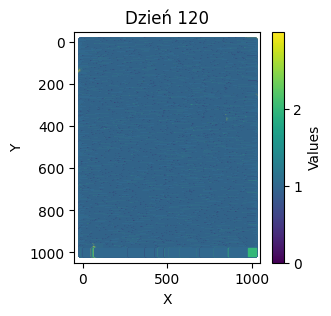

In [3]:
chorzy, ozdrowiali, podatni = load_from_files('./wyniki/bazowe/chorzy_kazdego_dnia.txt', './wyniki/bazowe/ozdrowiali_kazdego_dnia.txt', './wyniki/bazowe/podatni_kazdego_dnia.txt')

plot_results(chorzy, ozdrowiali, podatni)

plot_map('./wyniki/bazowe/mapa_0.txt', 'Dzień 0')
plot_map('./wyniki/bazowe/mapa_20.txt', 'Dzień 20')
plot_map('./wyniki/bazowe/mapa_40.txt', 'Dzień 40')
plot_map('./wyniki/bazowe/mapa_60.txt', 'Dzień 60')
plot_map('./wyniki/bazowe/mapa_80.txt', 'Dzień 80')
plot_map('./wyniki/bazowe/mapa_100.txt', 'Dzień 100')
plot_map('./wyniki/bazowe/mapa_final.txt', 'Dzień 120')


Następnie uruchomiono symulację dla parametru podróży równego 0.1:

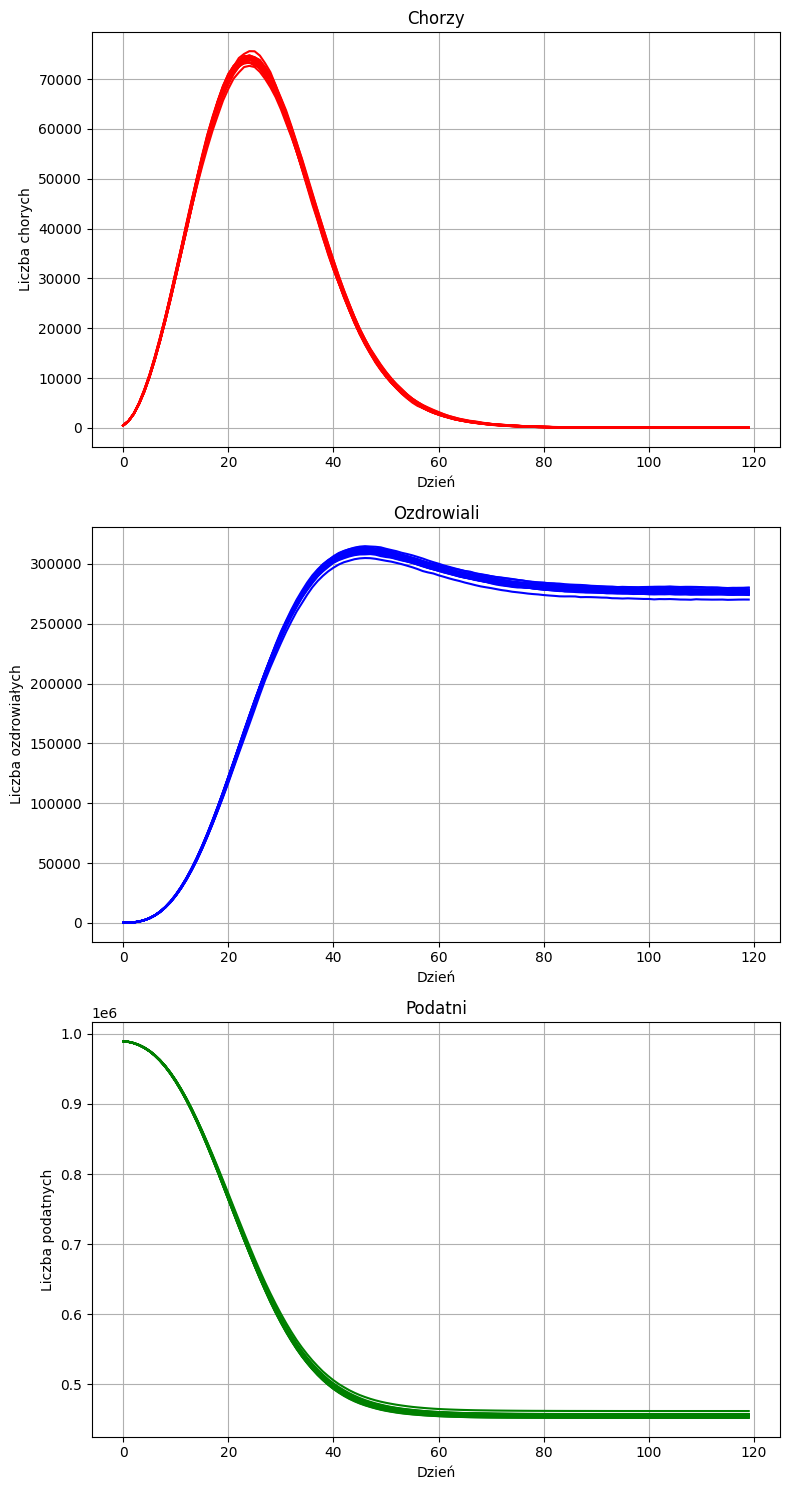

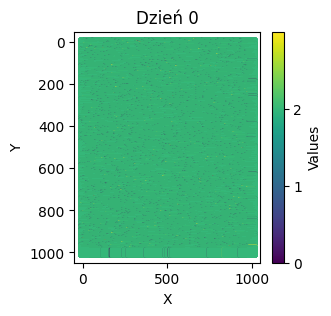

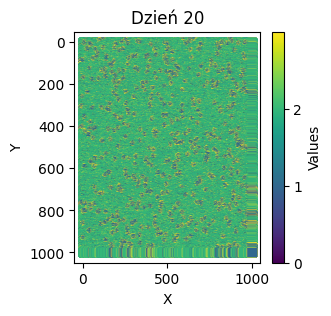

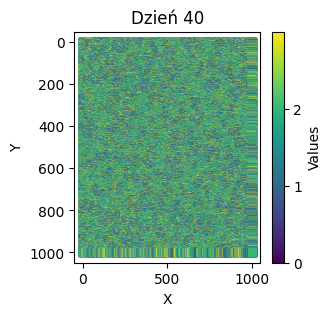

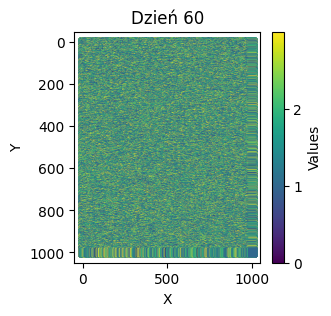

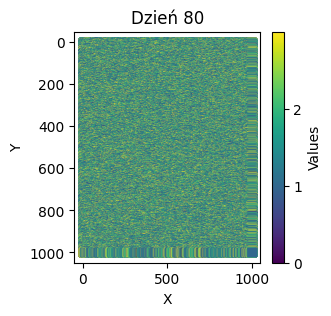

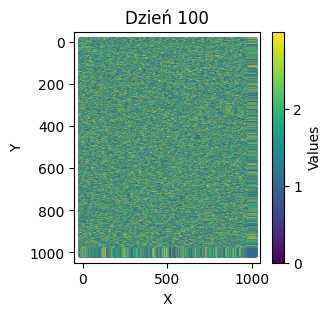

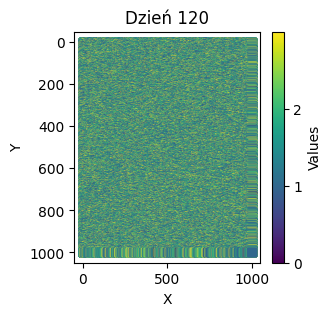

In [4]:
chorzy, ozdrowiali, podatni = load_from_files('./wyniki/w1/chorzy_kazdego_dnia.txt', './wyniki/w1/ozdrowiali_kazdego_dnia.txt', './wyniki/w1/podatni_kazdego_dnia.txt')

plot_results(chorzy, ozdrowiali, podatni)

plot_map('./wyniki/w1/mapa_0.txt', 'Dzień 0')
plot_map('./wyniki/w1/mapa_20.txt', 'Dzień 20')
plot_map('./wyniki/w1/mapa_40.txt', 'Dzień 40')
plot_map('./wyniki/w1/mapa_60.txt', 'Dzień 60')
plot_map('./wyniki/w1/mapa_80.txt', 'Dzień 80')
plot_map('./wyniki/w1/mapa_100.txt', 'Dzień 100')
plot_map('./wyniki/w1/mapa_final.txt', 'Dzień 120')


Następnie uruchomiono symulację dla parametru podróży równego 0.3:

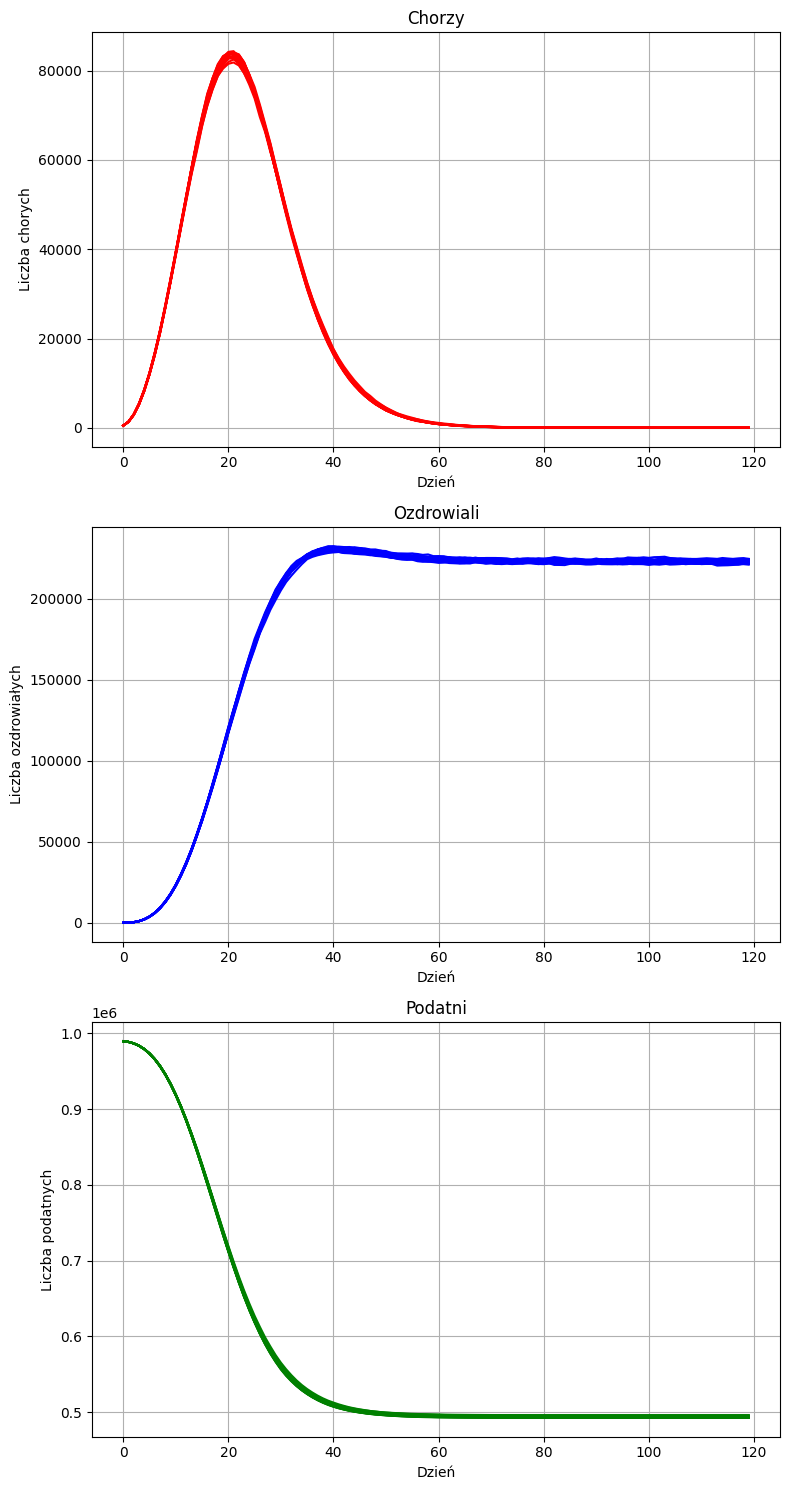

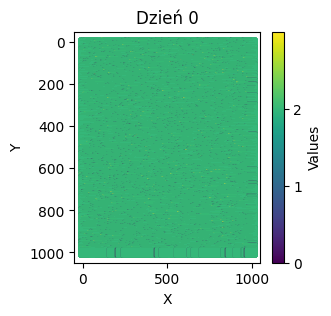

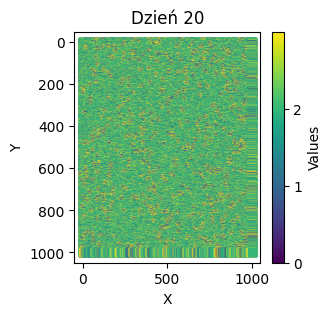

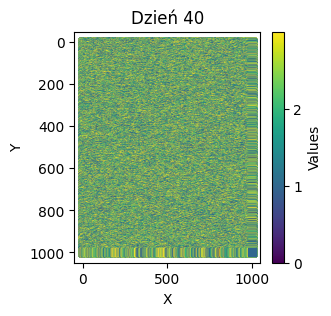

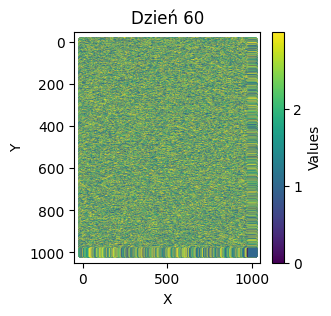

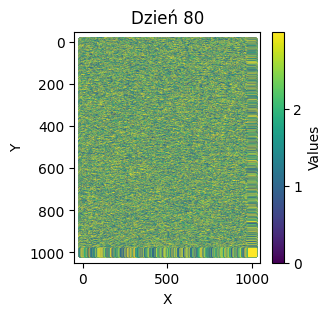

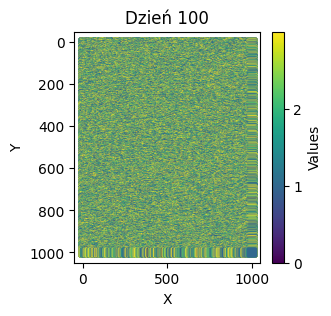

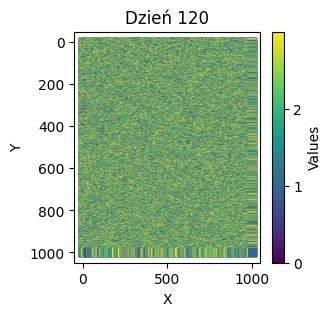

In [5]:
chorzy, ozdrowiali, podatni = load_from_files('./wyniki/w2/chorzy_kazdego_dnia.txt', './wyniki/w2/ozdrowiali_kazdego_dnia.txt', './wyniki/w2/podatni_kazdego_dnia.txt')

plot_results(chorzy, ozdrowiali, podatni)

plot_map('./wyniki/w2/mapa_0.txt', 'Dzień 0')
plot_map('./wyniki/w2/mapa_20.txt', 'Dzień 20')
plot_map('./wyniki/w2/mapa_40.txt', 'Dzień 40')
plot_map('./wyniki/w2/mapa_60.txt', 'Dzień 60')
plot_map('./wyniki/w2/mapa_80.txt', 'Dzień 80')
plot_map('./wyniki/w2/mapa_100.txt', 'Dzień 100')
plot_map('./wyniki/w2/mapa_final.txt', 'Dzień 120')


Następnie uruchomiono symulację dla parametru podróży równego 0.5:

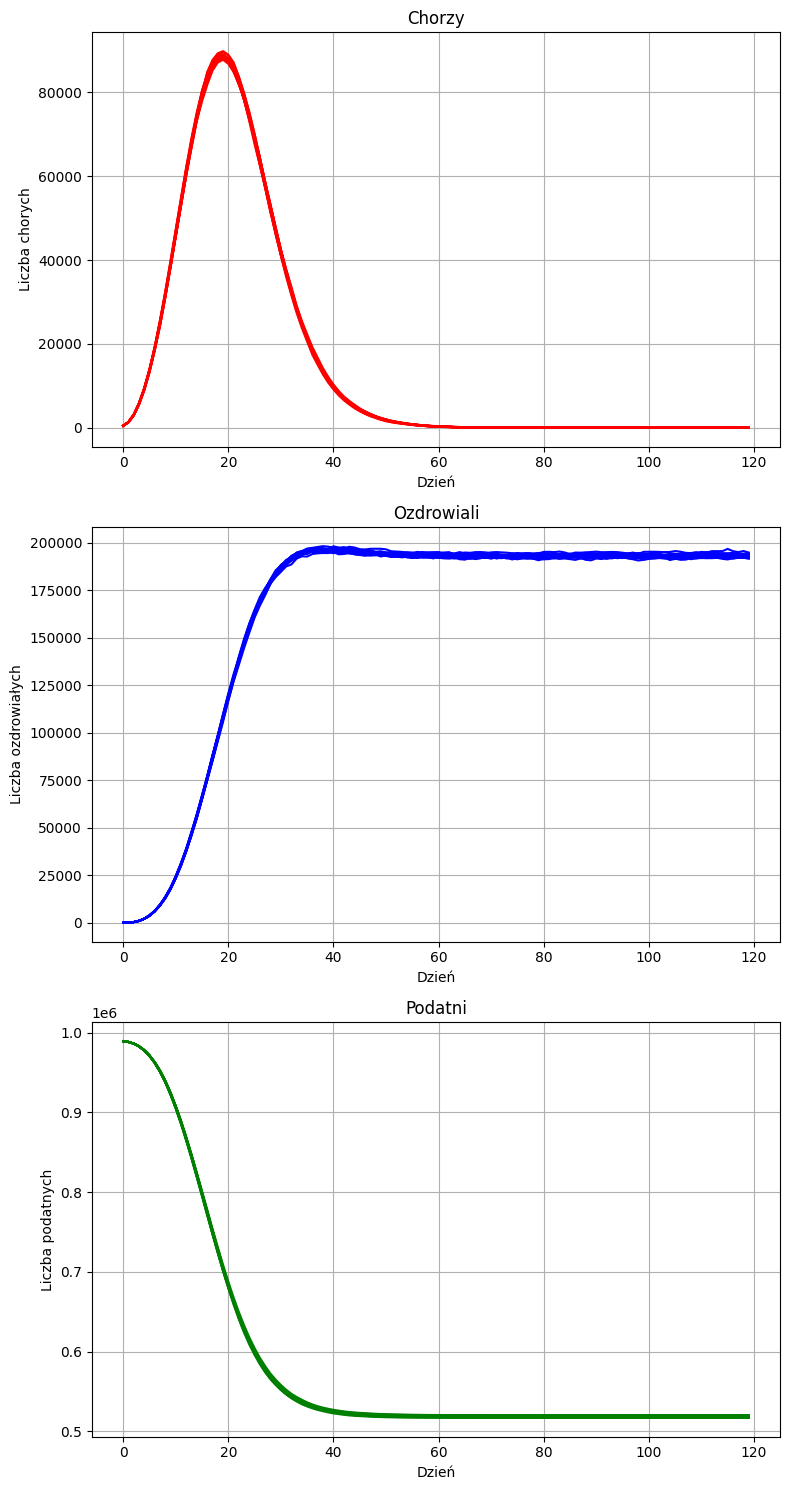

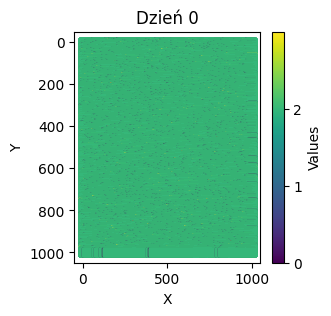

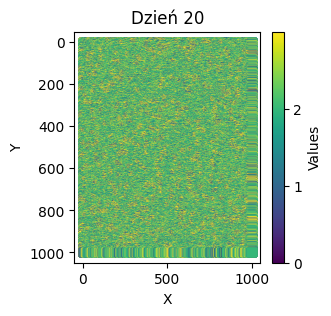

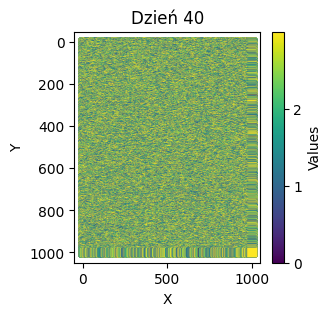

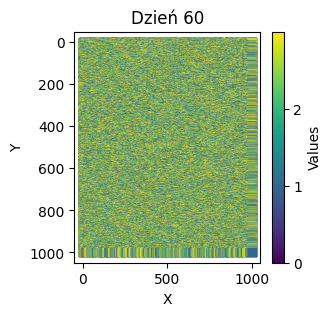

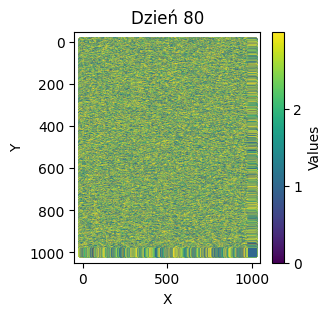

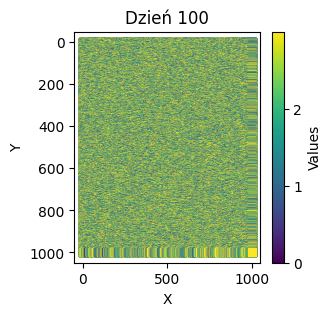

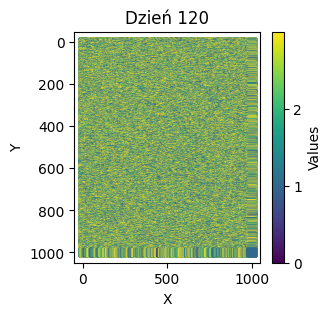

In [6]:
chorzy, ozdrowiali, podatni = load_from_files('./wyniki/w3/chorzy_kazdego_dnia.txt', './wyniki/w3/ozdrowiali_kazdego_dnia.txt', './wyniki/w3/podatni_kazdego_dnia.txt')

plot_results(chorzy, ozdrowiali, podatni)

plot_map('./wyniki/w3/mapa_0.txt', 'Dzień 0')
plot_map('./wyniki/w3/mapa_20.txt', 'Dzień 20')
plot_map('./wyniki/w3/mapa_40.txt', 'Dzień 40')
plot_map('./wyniki/w3/mapa_60.txt', 'Dzień 60')
plot_map('./wyniki/w3/mapa_80.txt', 'Dzień 80')
plot_map('./wyniki/w3/mapa_100.txt', 'Dzień 100')
plot_map('./wyniki/w3/mapa_final.txt', 'Dzień 120')


Następnie uruchomiono symulację dla parametru podróży równego 0.7:

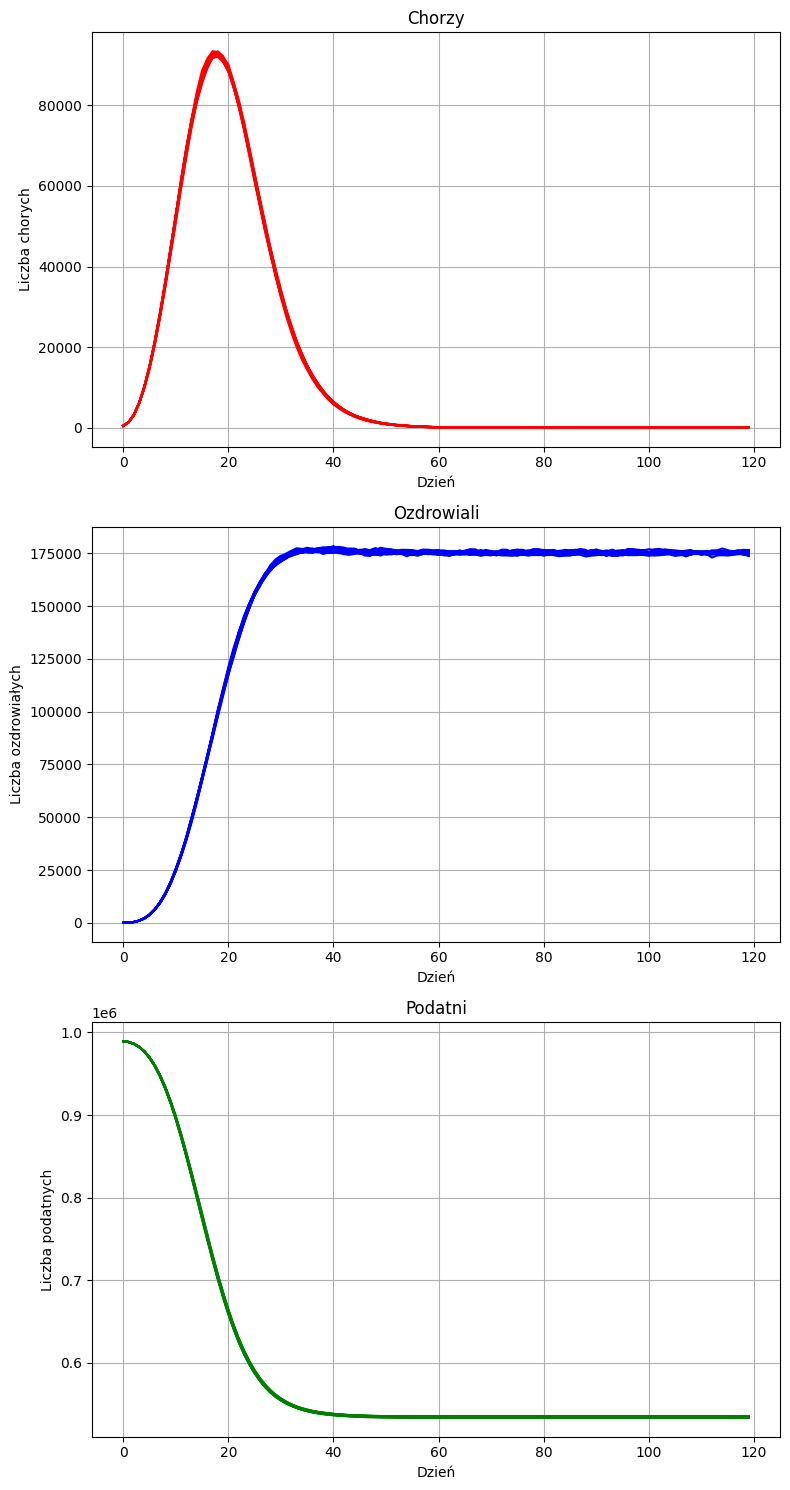

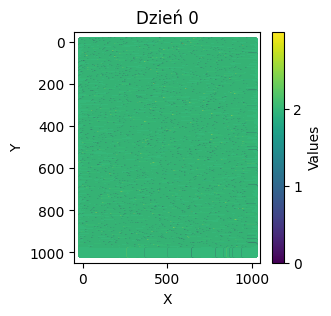

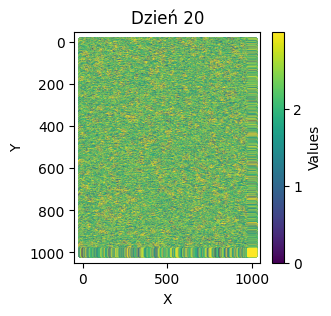

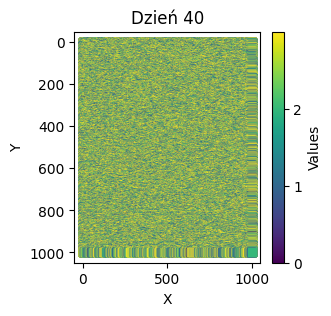

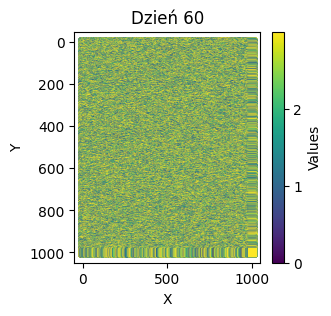

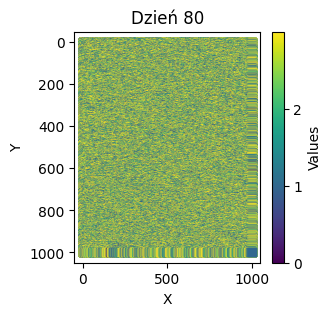

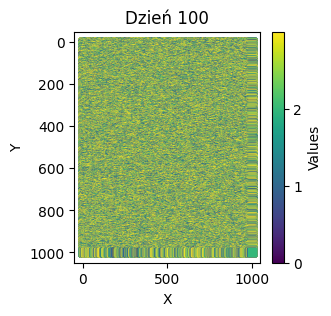

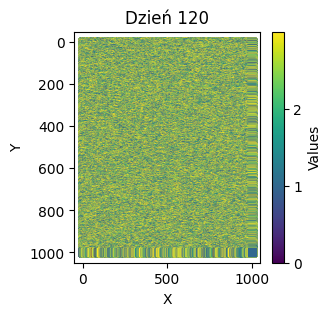

In [7]:
chorzy, ozdrowiali, podatni = load_from_files('./wyniki/w4/chorzy_kazdego_dnia.txt', './wyniki/w4/ozdrowiali_kazdego_dnia.txt', './wyniki/w4/podatni_kazdego_dnia.txt')

plot_results(chorzy, ozdrowiali, podatni)

plot_map('./wyniki/w4/mapa_0.txt', 'Dzień 0')
plot_map('./wyniki/w4/mapa_20.txt', 'Dzień 20')
plot_map('./wyniki/w4/mapa_40.txt', 'Dzień 40')
plot_map('./wyniki/w4/mapa_60.txt', 'Dzień 60')
plot_map('./wyniki/w4/mapa_80.txt', 'Dzień 80')
plot_map('./wyniki/w4/mapa_100.txt', 'Dzień 100')
plot_map('./wyniki/w4/mapa_final.txt', 'Dzień 120')


Następnie uruchomiono symulację dla parametru podróży równego 0.9:

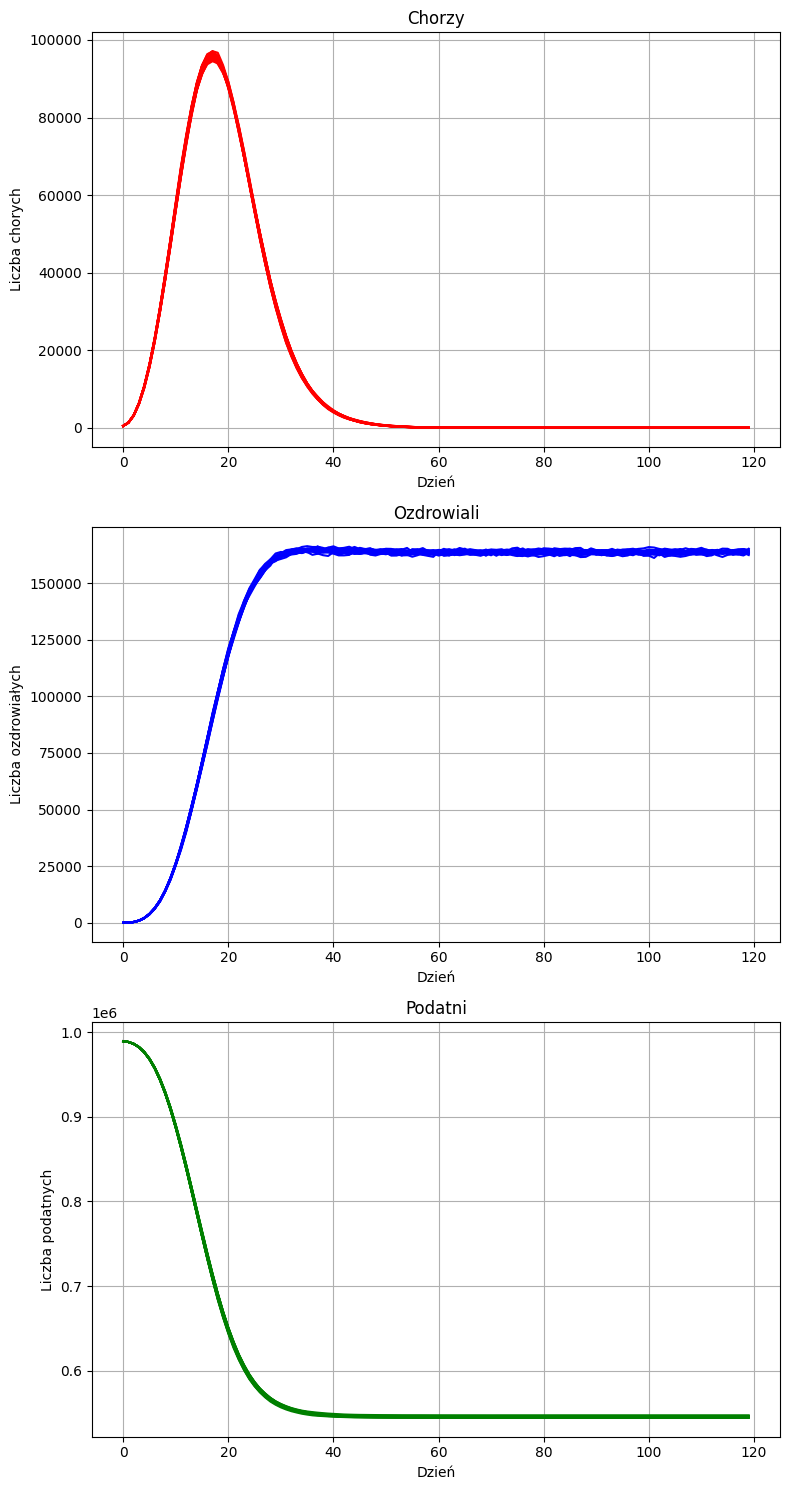

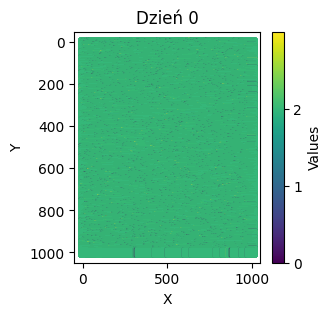

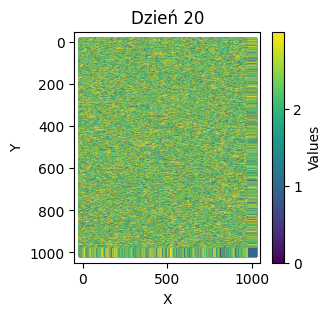

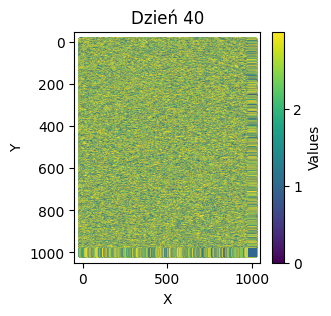

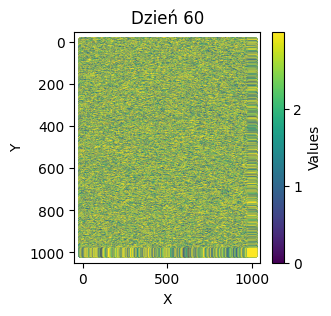

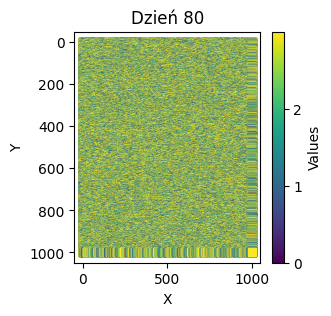

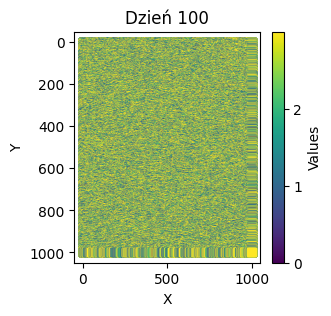

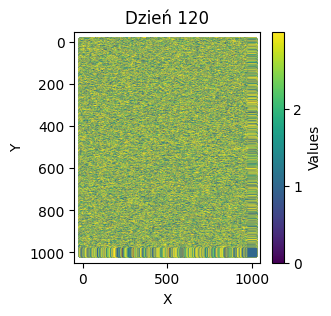

In [8]:
chorzy, ozdrowiali, podatni = load_from_files('./wyniki/w5/chorzy_kazdego_dnia.txt', './wyniki/w5/ozdrowiali_kazdego_dnia.txt', './wyniki/w5/podatni_kazdego_dnia.txt')

plot_results(chorzy, ozdrowiali, podatni)

plot_map('./wyniki/w5/mapa_0.txt', 'Dzień 0')
plot_map('./wyniki/w5/mapa_20.txt', 'Dzień 20')
plot_map('./wyniki/w5/mapa_40.txt', 'Dzień 40')
plot_map('./wyniki/w5/mapa_60.txt', 'Dzień 60')
plot_map('./wyniki/w5/mapa_80.txt', 'Dzień 80')
plot_map('./wyniki/w5/mapa_100.txt', 'Dzień 100')
plot_map('./wyniki/w5/mapa_final.txt', 'Dzień 120')

# Podsumowanie 
| w. parametru | szczyt zachorowań dnia | l. zarażonych w szczycie | l. zarażonych powyżej 5% pop. | l. zarażonych poniżej 5% pop. |
| --- | --- | --- | --- | --- |
| 0.0 | 32 | 83061 (8%) | 40 dni | 63 dni |
| 0.1 | 24 | 75590 (7%) | 20 dni | 85 dni |
| 0.3 | 21 | 82508 (8%) | 19 dni | 89 dni | 
| 0.5 | 19 | 88816 (8%) | 18 dni | 91 dni |
| 0.7 | 18 | 92847 (9%) | 17 dni | 93 dni |
| 0.9 | 17 | 95933 (9%) | 17 dni | 93 dni |


W kwestii wpływu podróżny na liczbę zachorowań, ogólny czas i przebieg pandemii można zaobserwować, że dla bardzo małego powoduje on mniejszy szczyt zachorowań oraz ich wcześniejszy pik. Dla większych wartości parametru podróży szczyty zachorowań są większe niż dla społeczeństwa zamkniętego, ale dzięki temu najbardziej intensywny okres trwa krócej. Pandemia jest intensywniejsza na początku, lecz dzięki temu szybciej kończy się okres największych zachorowań (okres liczby zarażonych powyżej 5% trwa prawie 2x krócej). Niestety okres w którym zachorowania są poniżej 5% się opóźnia, co najpewniej wynika z tego, że chorzy jeszcze 'wyłapują' nieodpornych przez co proces się wydłuża. <br>
Ponadto widać też, jak podróże ujednolicają ponowne uruchomienia symulacji, odchylenia kolejnych uruchomień są coraz mniejsze.<br>
Po mapie osobników można zauważyć, że dla parametru 0 wygląda on jak rozszerzające się wyspy, kóre następnie pokrywają całą mapę. Dla symulacji z podróżami, bardzo szybko ten wzór zanika - populacja od razu się miejsza, przez co mapa wygląda jak szum na telewizorze. <br>
Na podstawie tych badań można stwierdzić, że dla państw z dobrym zapleczem medycznym i potrzebą na nie zamykanie przedsiębiorstw (z uwagi na krytyczność nieprzerwanego działania pewnych przedsiębiorstw/potrzebę do szybszego powrotu do 'normalności') korzystniejsze jest wprowadzenie mniejszych restrykcji odnośnie podróży (oczywiście dla scenariusza, że chorobę się tylko odbywa, bowiem symulacja zakłada że chorzy zawsze w końcu się ozdrowią).